In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime 

In [13]:
df = pd.read_csv('mahsa-eor0-eor1-sepnights.csv')
df['date']

0       2015-09-08
1       2015-09-08
2       2015-09-08
3       2015-09-08
4       2015-09-08
           ...    
1183    2015-12-29
1184    2015-12-29
1185    2015-12-29
1186    2015-12-29
1187    2015-12-29
Name: date, Length: 1188, dtype: object

In [14]:
df = pd.read_csv('mahsa-eor0-eor1-sepnights.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.sort_values(by=['date'])
#print (df_eor0['utc'].dt)
dates = df['date'].dt.date.unique()
print (dates)

[datetime.date(2015, 9, 8) datetime.date(2015, 9, 10)
 datetime.date(2015, 9, 12) datetime.date(2015, 9, 14)
 datetime.date(2015, 9, 22) datetime.date(2015, 9, 24)
 datetime.date(2015, 10, 6) datetime.date(2015, 10, 8)
 datetime.date(2015, 10, 10) datetime.date(2015, 10, 12)
 datetime.date(2015, 10, 14) datetime.date(2015, 10, 20)
 datetime.date(2015, 10, 22) datetime.date(2015, 10, 30)
 datetime.date(2015, 11, 21) datetime.date(2015, 11, 23)
 datetime.date(2015, 11, 29) datetime.date(2015, 12, 3)
 datetime.date(2015, 12, 5) datetime.date(2015, 12, 9)
 datetime.date(2015, 12, 11) datetime.date(2015, 12, 23)
 datetime.date(2015, 12, 29)]


/Users/mahsa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


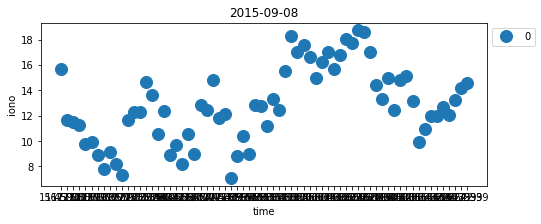

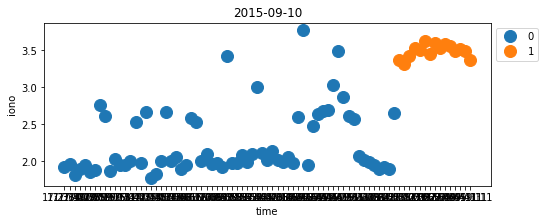

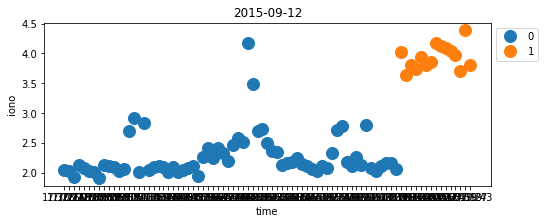

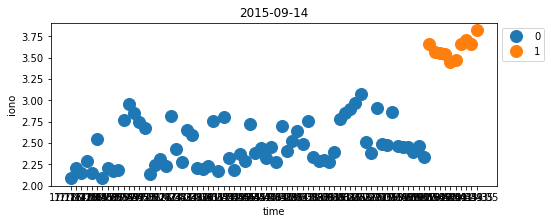

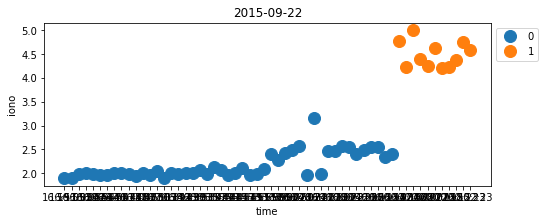

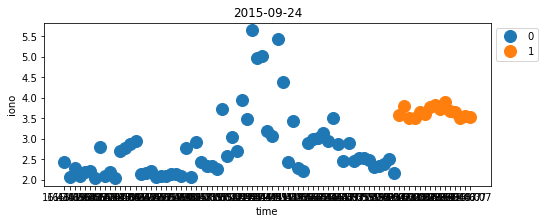

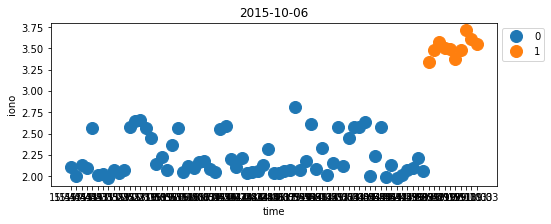

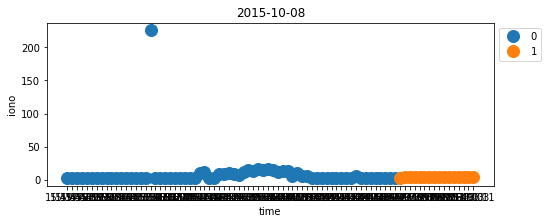

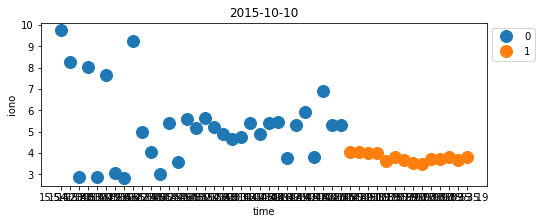

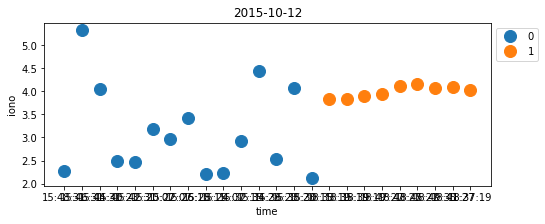

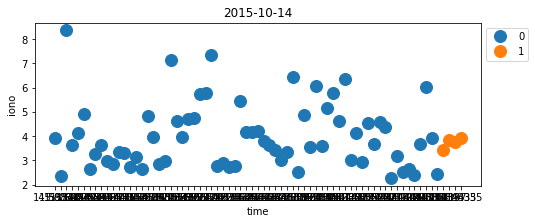

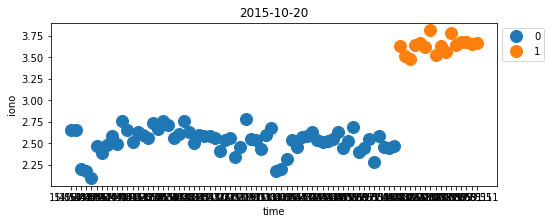

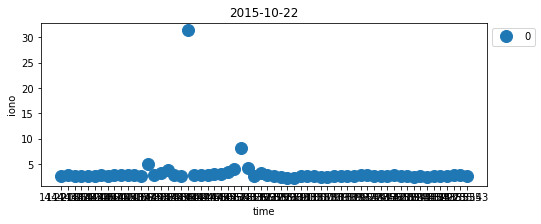

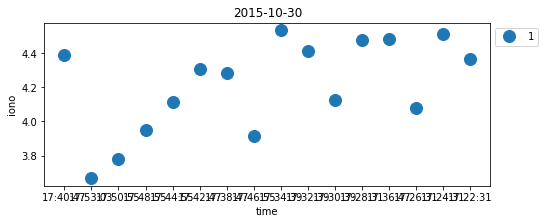

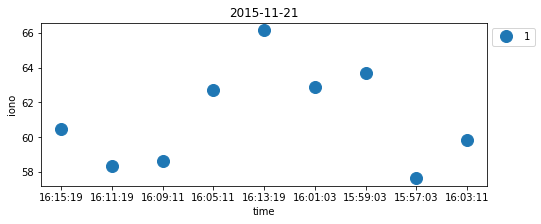

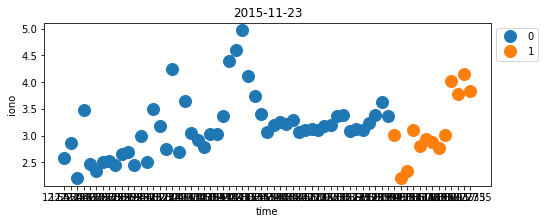

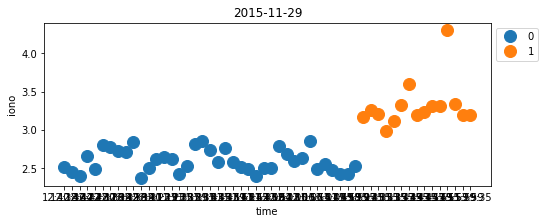

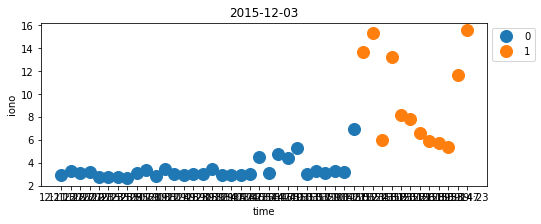

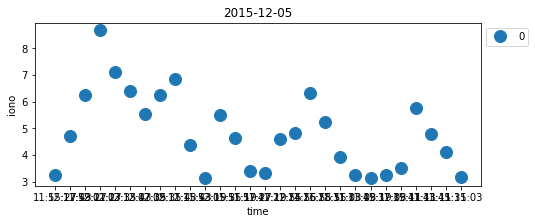

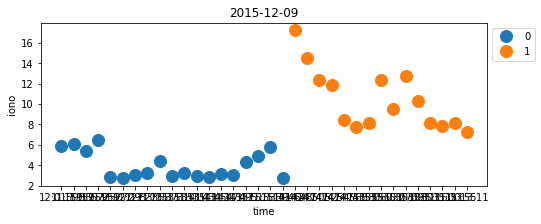

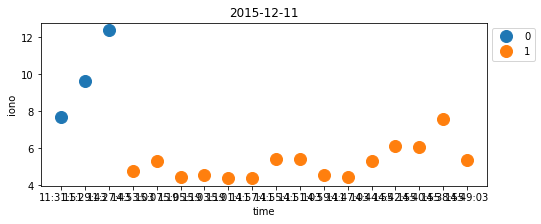

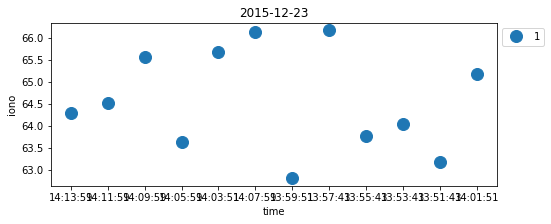

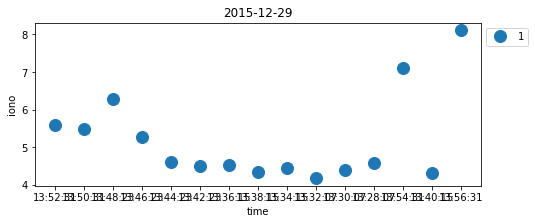

In [23]:
for dd in dates:
    df_temp = df[df['date'].dt.date == dd]
    groups = df_temp.groupby('field')
    fig, ax = plt.subplots(figsize=(8,3))
    ax.margins(0.05)
    #ax.set_ylim((17.5,21.0))
    #ax.set_xlim((-1.25,1.0))
    for name, group in groups:
        ax.plot(group.time, group.iono, marker='o', linestyle='', ms=12, label=name)
        plt.legend(bbox_to_anchor=(1,1), loc="upper left")
        plt.title(dd)
        plt.ylabel("iono")
        plt.xlabel("time")
        plt.savefig("iono_compare"+str(dd) )       
plt.show()